In [29]:
import pandas as pd

In [33]:
data= pd.read_csv("diabetes_prediction_dataset.csv")
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [34]:
data.gender = data.gender.map({"Female":1, "Male": 2, "Other":3})
data.smoking_history = data.smoking_history.map({"never":1, "No Info": 2, "current":3, "former": 4, "ever": 5, "not current":6})
bins = [0,18,40,65,100]
names= ["1", "2", "3", "4" ]  #["child", "young", "middleman", "oldman" ]
data["age"] = pd.cut(data["age"], bins=bins, labels= names, include_lowest= True)
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,4,0,1,1,25.19,6.6,140,0
1,1,3,0,0,2,27.32,6.6,80,0
2,2,2,0,0,1,27.32,5.7,158,0
3,1,2,0,0,3,23.45,5.0,155,0
4,2,4,1,1,3,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,1,4,0,0,2,27.32,6.2,90,0
99996,1,1,0,0,2,17.37,6.5,100,0
99997,2,4,0,0,4,27.83,5.7,155,0
99998,1,2,0,0,1,35.42,4.0,100,0


In [267]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [81]:
new_data = data.to_numpy()

X = new_data[:, : -1]
y = new_data[:, -1].astype(int)

In [82]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
linear_model = LogisticRegression(C=1)

In [184]:
fitted_model= linear_model.fit(x_train, y_train)

/home/thecoderman/data/Python Apps/text_classification_eda/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [185]:
y_pred= fitted_model.predict(x_test)
y_pred_proba = fitted_model.predict_proba(x_test)

TP, TN, FP, FN değerlerini confusion matrix ile alma

In [326]:
conf_m = confusion_matrix(y_test, y_pred)
TP, FP, FN, TN = conf_m[0][0], conf_m[0][1], conf_m[1][0], conf_m[1][1]
TP, FP, FN, TN

(18050, 242, 1032, 676)

Accuracy (TP+TN)/(TP+TN+FP+FN)

In [328]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
precision = (TP) / (TP + FP)
recall = (TP) / (TP + FN)
f1score = (2 * (precision  * recall)) / (precision + recall)
print(f"Accuracy Score : {accuracy}")
print(f"Precision : {precision}")
print(f"recall  : {recall}")
print(f"F1 Score  : {f1score}")
print(f"Sensitivity : {TP / float(TP+FN)}")
print(f"Specificity : {TN / float(TP+FP)}")

Accuracy Score : 0.9363
Precision : 0.9867701727531161
recall  : 0.9459176186982496
F1 Score  : 0.9659121314282656
Sensitivity : 0.9459176186982496
Specificity : 0.03695604635906407


In [329]:
data = { 'Diabetes':y_test, 'Prediction':y_train_pred, 'Accuracy': [i[1] if i[0] > i[0] else i[1] for i in y_pred_proba]}
dib_train = pd.DataFrame(data)
dib_train

,Diabetes,Prediction,Accuracy
0,0,0,0.026926
1,0,0,0.020384
2,0,0,0.015576
3,0,0,0.034469
4,1,0,0.146611
...,...,...,...
19995,0,0,0.044333
19996,0,0,0.022610
19997,0,0,0.007481
19998,0,0,0.372791


In [330]:
print("accuracy :", accuracy_score(dib_train.Diabetes, dib_train.Prediction))
print("confusion matrix :", confusion_matrix(dib_train.Diabetes, dib_train.Prediction))

accuracy : 0.9363
confusion matrix : [[18050   242]
 [ 1032   676]]


In [331]:
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    dib_train[i]= dib_train.Accuracy.map(lambda x: 1 if x > i else 0)
dib_train

,Diabetes,Prediction,Accuracy,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0,0.026926,1,0,0,0,0,0,0,0,0,0
1,0,0,0.020384,1,0,0,0,0,0,0,0,0,0
2,0,0,0.015576,1,0,0,0,0,0,0,0,0,0
3,0,0,0.034469,1,0,0,0,0,0,0,0,0,0
4,1,0,0.146611,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0.044333,1,0,0,0,0,0,0,0,0,0
19996,0,0,0.022610,1,0,0,0,0,0,0,0,0,0
19997,0,0,0.007481,1,0,0,0,0,0,0,0,0,0
19998,0,0,0.372791,1,1,1,1,0,0,0,0,0,0


In [332]:
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])

In [333]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(dib_train.Diabetes, dib_train[i])
    total1=sum(sum(cm1))
    Accuracy = (cm1[0,0]+cm1[1,1])/total1
    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,Accuracy,Sensitivity,Specificity]

In [334]:
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0   0.08540     1.000000     0.000000
0.1          0.1   0.87890     0.778689     0.888257
0.2          0.2   0.92900     0.680913     0.952165
0.3          0.3   0.93490     0.585480     0.967527
0.4          0.4   0.93450     0.476581     0.977258
0.5          0.5   0.93630     0.395785     0.986770
0.6          0.6   0.93470     0.326698     0.991472
0.7          0.7   0.93275     0.269321     0.994697
0.8          0.8   0.92985     0.211944     0.996884
0.9          0.9   0.92380     0.125293     0.998360


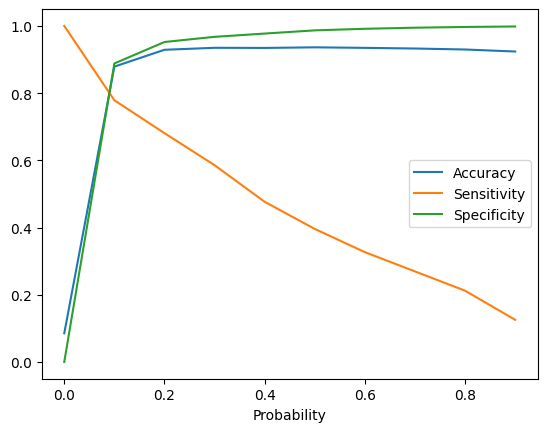

In [335]:
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

In [368]:
dib_train['Prediction_CUT_OFF'] = dib_train.Accuracy.map(lambda x: 1 if x > 0.16 else 0)

In [369]:
conf_m = confusion_matrix(dib_train.Diabetes, dib_train.Prediction_CUT_OFF)
TP, FP, FN, TN = conf_m[0][0], conf_m[0][1], conf_m[1][0], conf_m[1][1]
TP, FP, FN, TN

(17101, 1191, 480, 1228)

In [371]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
precision = (TP) / (TP + FP)
recall = (TP) / (TP + FN)
f1score = (2 * (precision  * recall)) / (precision + recall)
print(f"Accuracy Score : {accuracy}")
print(f"Precision : {precision}")
print(f"recall  : {recall}")
print(f"F1 Score  : {f1score}")
print(f"Sensitivity : {TP / float(TP+FN)}")
print(f"Specificity : {TN / float(TN+FP)}")

Accuracy Score : 0.91645
Precision : 0.9348895692105839
recall  : 0.972697798760025
F1 Score  : 0.9534190059376132
Sensitivity : 0.972697798760025
Specificity : 0.5076477883422902
